<a href="https://colab.research.google.com/github/JoshuaMcGraw/Fractal-Generator/blob/main/Fractal_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import choice
from time import time

def return_df(n, e):
    """ Return the fractal dimension of a definition seed """
    return np.log10(n)/np.log10(e)

def return_distance(start, end):
    return np.linalg.norm(np.array(start) - np.array(end))

def return_points(seed, start_point, parent_angle, scale):
    """ Given a fractal seed, start and parent angle, return the points """
    points = []
    last_point = start_point
    for i, angle in enumerate(seed):
        points.append(last_point)
        next_x = last_point[0] + (np.cos(np.radians(parent_angle + angle)) * scale)
        next_y = last_point[1] + (np.sin(np.radians(parent_angle + angle)) * scale)
        last_point = (next_x, next_y)
    points += [last_point]
    return points

In [ ]:
class fractal:

    def __init__(self, seed):
        self.seed = seed
        self.init_points = return_points(seed, (0, 0), 0, 1)
        self.points = self.init_points
        self.leg_length = return_distance(self.points[0], self.points[1])
        self.full_length = return_distance(self.points[0], self.points[-1])
        self.ratio = (self.leg_length/self.full_length)
        self.last_point = self.init_points[-1]

    def propagate(self):
        new_points = []
        for i in range(len(self.points) - 1):
            angle = np.degrees(np.arctan2(self.points[i+1][1] - self.points[i][1], self.points[i+1][0] - self.points[i][0]))
            new_scale = return_distance(self.points[i], self.points[i+1]) * self.ratio
            new_points += return_points(self.seed, self.points[i], angle, new_scale)[:-1]
        self.points = new_points + [self.last_point]
        #self.seed = a = np.linspace(90, -360, len(self.seed - 10))

    def show(self):
        plt.style.use('dark_background')
        x = [x for (x, y) in self.points]
        y = [y for (x, y) in self.points]
        plt.figure(figsize=(6,6))
        fig = plt.plot(x, y, color=choice(['red', 'orange', 'yellow', 'green', 'blue']))
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        

        plt.axis('square')
        plt.show()


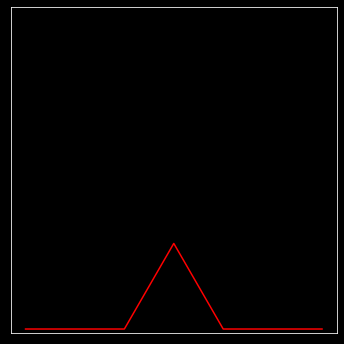

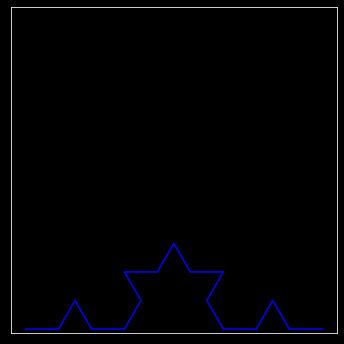

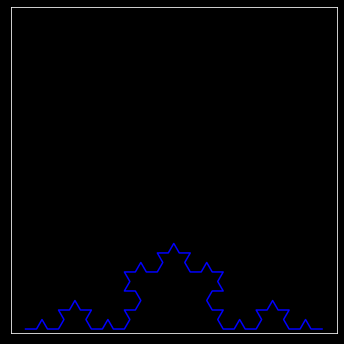

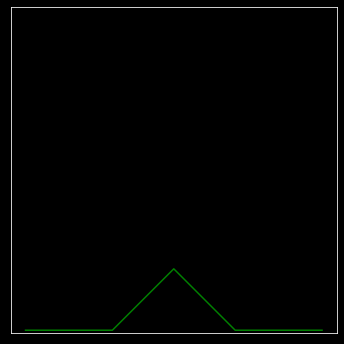

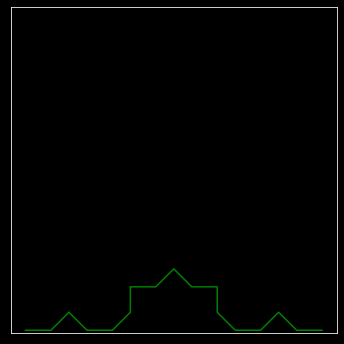

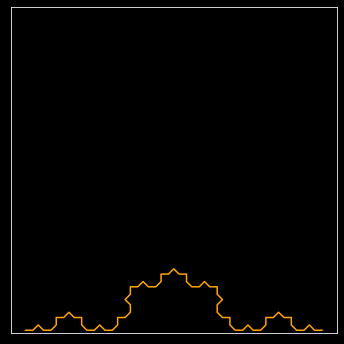

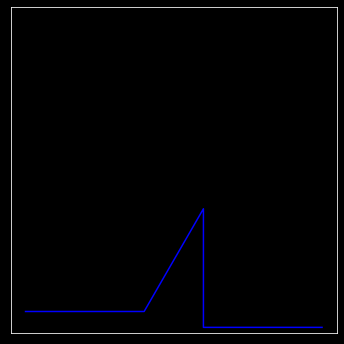

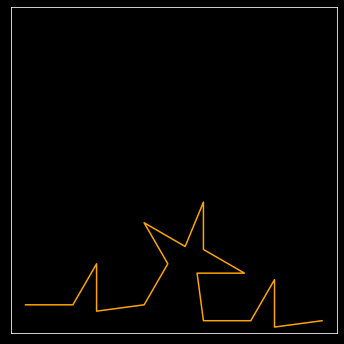

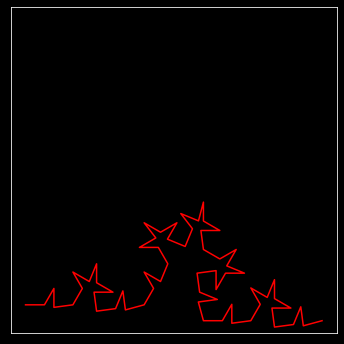

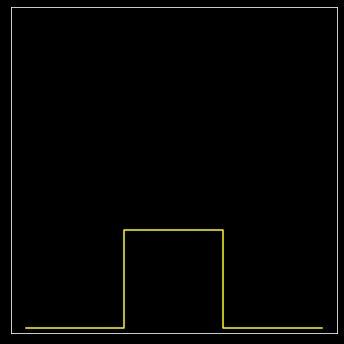

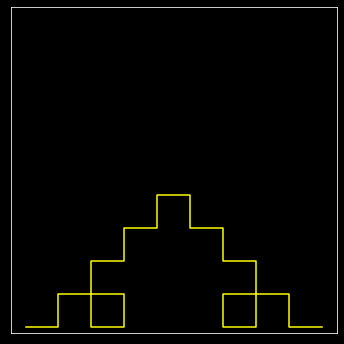

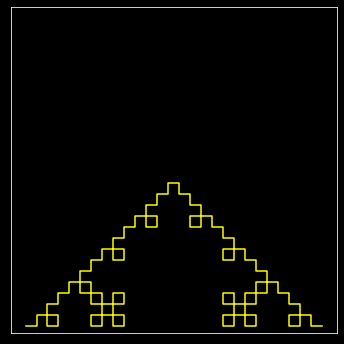

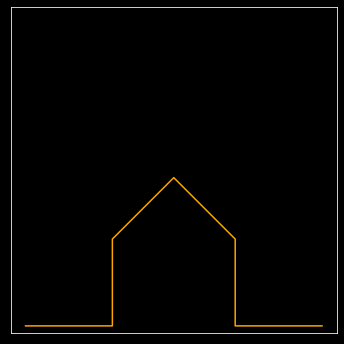

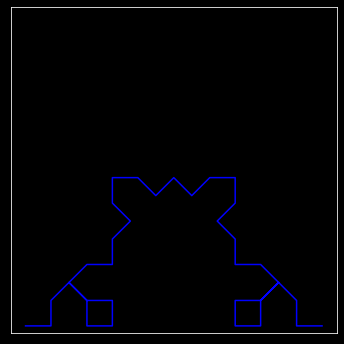

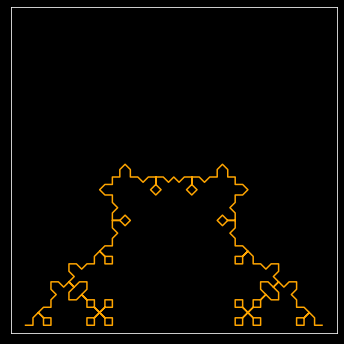

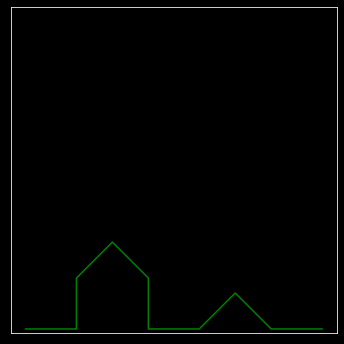

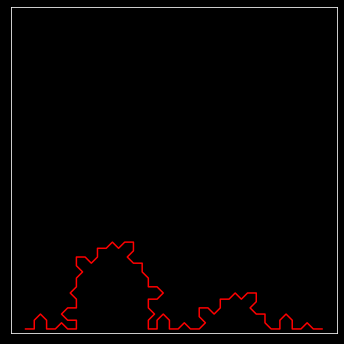

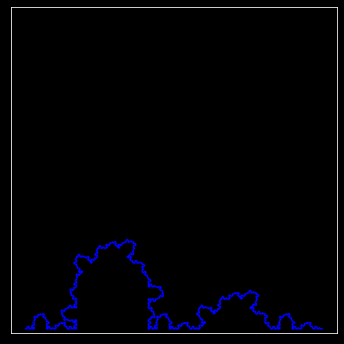

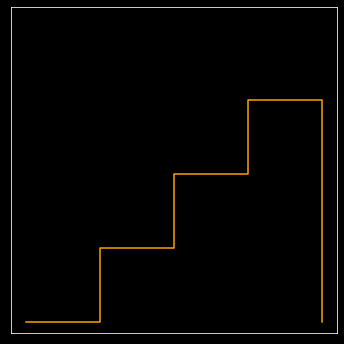

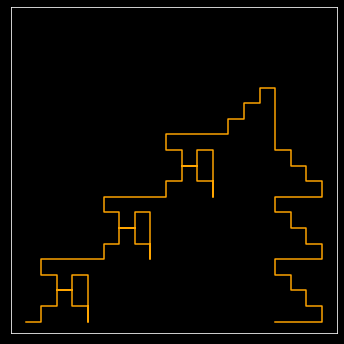

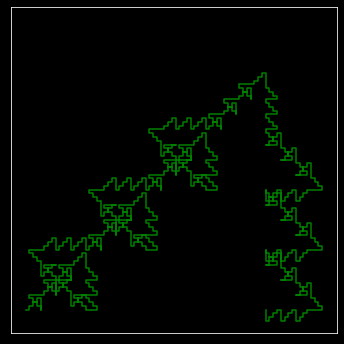

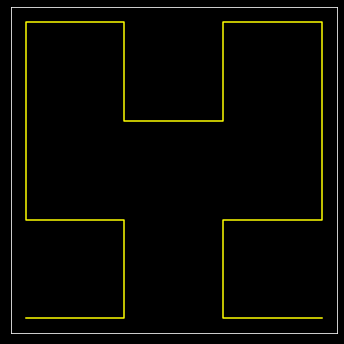

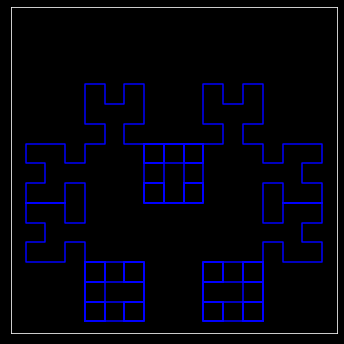

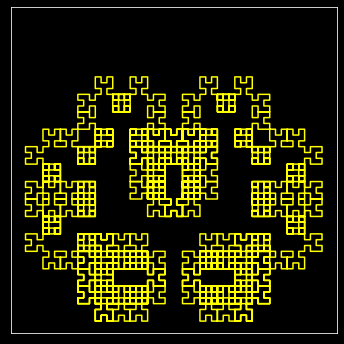

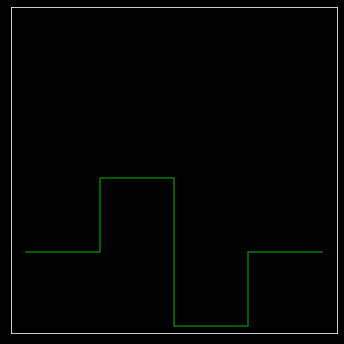

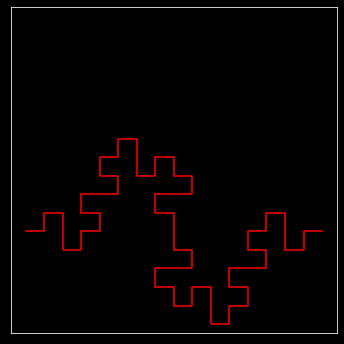

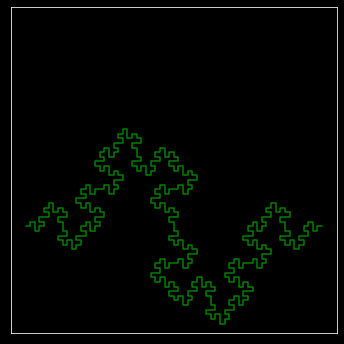

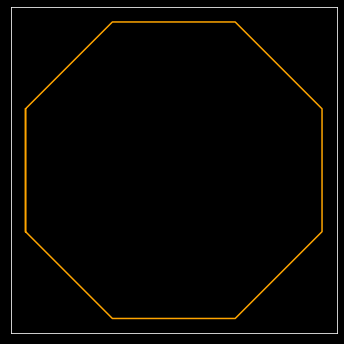

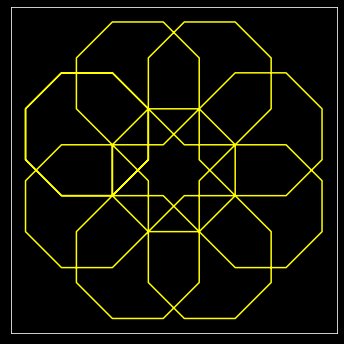

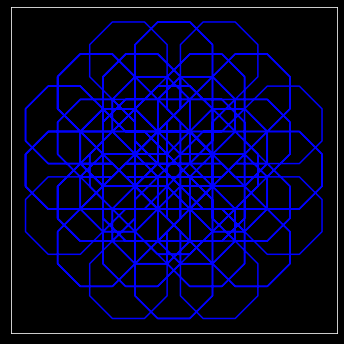

In [ ]:
u, r, d, l = 90, 0, -90, 180  # Shorthand
ur, dr, dl, ul = 45, -45, 225, 135

fractals = [        
[0, 60, -60, 0],
[0, 45, -45, 0],
[0, 60, -90, 0],
[0, 90, 0, -90, 0],
[0, 90, 45, -45, -90, 0],
[0, 90, 45, -45, -90, 0, 45, -45, 0],
[r, u, r, u, r, u, r, d, d, d],
[r, u, l, u, u, r, d, r, u, r, d, d, l, d, r],
[r, u, r, d, d, r, u, r],
[u, ur, r, dr, d, dl, l, ul, u],
]

#a = [i for i in range(90, -360, -1)]

#a = np.linspace(90, -90, 50)

# You can pass functions as a seed

# f = fractal([u, ur, ur, ur, ur, ur, r, d, dl, dr, ur, d, r, u, dr, ur, ul, u, r, dr, dr, dr, dr, dr, d])
# f.show()
# f.propagate()
# f.show()

for seed in fractals:
    f = fractal(seed)
    f.show()
    for i in range(2):
        f.propagate()
        f.show()